# Heart Disease Prediction Using 4 Models

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 26.November.2024\
`Dataset:` [Hear Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### About Dataset (Meta data)
#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina.
  2. atypical angina.
  3. non-anginal.
  4. asymptomatic.
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:`[normal; fixed defect; reversible defect]
* `num:` the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Import Libraries

In [33]:
# Import libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the Dataset

In [34]:
df = pd.read_csv('Data/data.csv')

# Display the first 10 rows of the dataset
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


# Data Preprocessing

In [35]:
# Explore the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [36]:
#Checking the data shape
df.shape

(920, 16)

In [37]:
# Check for missing values in the dataset
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

There are some columns in the datset which has missing values.


Columns contain missing values :
trestbps,
chol,
fbs,
restecg,
thalch,
exang,
oldpeak,
slope,
ca,
thal



In [38]:
# Summary statistics of numerical columns
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [39]:
# Display the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [40]:
# Check unique values in categorical columns
print("Sex:", df['sex'].unique())
print("dataset:", df['dataset'].unique())
print("Chest Pain Type:", df['cp'].unique())
print("fbs Type:", df['fbs'].unique())
print("Resting Electrocardiographic Results:", df['restecg'].unique())
print("Exercise Induced Angina:", df['exang'].unique())
print("exang Type:", df['exang'].unique())
print("Slope Type:", df['slope'].unique())
print("Thal Type:", df['thal'].unique())

Sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Chest Pain Type: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs Type: [True False nan]
Resting Electrocardiographic Results: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Exercise Induced Angina: [False True nan]
exang Type: [False True nan]
Slope Type: ['downsloping' 'flat' 'upsloping' nan]
Thal Type: ['fixed defect' 'normal' 'reversable defect' nan]


In [41]:
# Check missing values in numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
missing_numerical = df[numerical_columns].isnull().sum()

print("Missing values in numerical columns:")
print(missing_numerical)

Missing values in numerical columns:
id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64


In [42]:
# Check missing values in categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
missing_categorical = df[categorical_columns].isnull().sum()

print("Missing values in categorical columns:")
print(missing_categorical)

Missing values in categorical columns:
sex          0
dataset      0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64


In [43]:
# Handle missing values in numerical columns by filling with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify if missing values are handled
missing_numerical_after = df[numerical_columns].isnull().sum()
print("Missing values in numerical columns after imputation:")
print(missing_numerical_after)

Missing values in numerical columns after imputation:
id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
dtype: int64


In [44]:
# Handle missing values in categorical columns by filling with the mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify if missing values are handled
missing_categorical_after = df[categorical_columns].isnull().sum()
print("Missing values in categorical columns after imputation:")
print(missing_categorical_after)

Missing values in categorical columns after imputation:
sex        0
dataset    0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64


In [45]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Now there are no missing values in the dataset

In [49]:
# Check NaN values in the entire dataset
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


There are no nan values in the entire dataset

In [48]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display Transformed Columns
print("Transformed dataset (all columns):\n", df[categorical_columns].head())


Transformed dataset (all columns):
    sex  dataset  cp  fbs  restecg  exang  slope  thal
0    1        0   3    1        0      0      0     0
1    1        0   0    0        0      1      1     1
2    1        0   0    0        0      1      1     2
3    1        0   2    0        1      0      0     1
4    0        0   1    0        0      0      2     1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  num       920 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.1 KB


Now all the columns are in either integer or in float

In [61]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
5,6,56,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,1,0
6,7,62,0,0,0,140.0,268.0,0,0,160.0,0,3.6,0,2.0,1,3
7,8,57,0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,1,0
8,9,63,1,0,0,130.0,254.0,0,0,147.0,0,1.4,1,1.0,2,2
9,10,53,1,0,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,2,1


# Exploratory Data Analysis (EDA)

Summary statistics for numerical columns:
                id         age         sex     dataset          cp    trestbps  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870    0.789130    1.238043    0.782609  132.132404   
std    265.725422    9.424685    0.408148    1.130673    0.956350   18.443895   
min      1.000000   28.000000    0.000000    0.000000    0.000000    0.000000   
25%    230.750000   47.000000    1.000000    0.000000    0.000000  120.000000   
50%    460.500000   54.000000    1.000000    1.000000    0.000000  130.000000   
75%    690.250000   60.000000    1.000000    2.000000    2.000000  140.000000   
max    920.000000   77.000000    1.000000    3.000000    3.000000  200.000000   

             chol         fbs     restecg      thalch       exang     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   199.130337    0.150000    0.990217  137.545665    0.366304

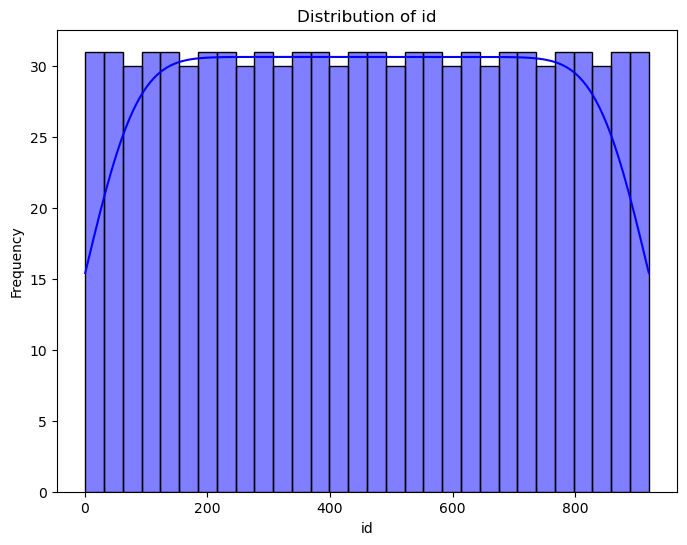

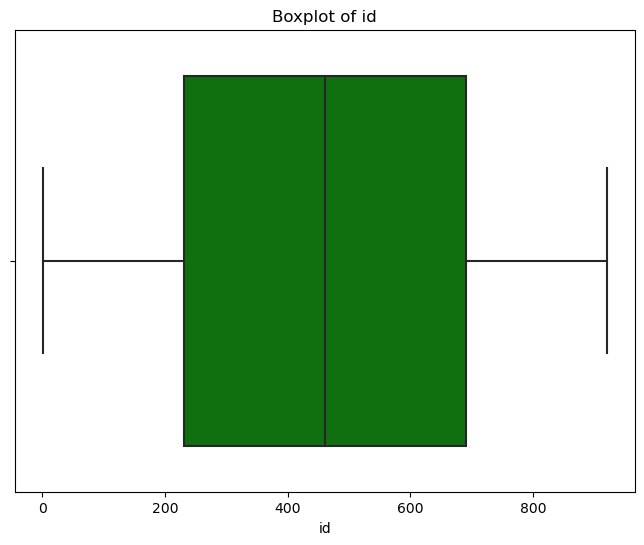

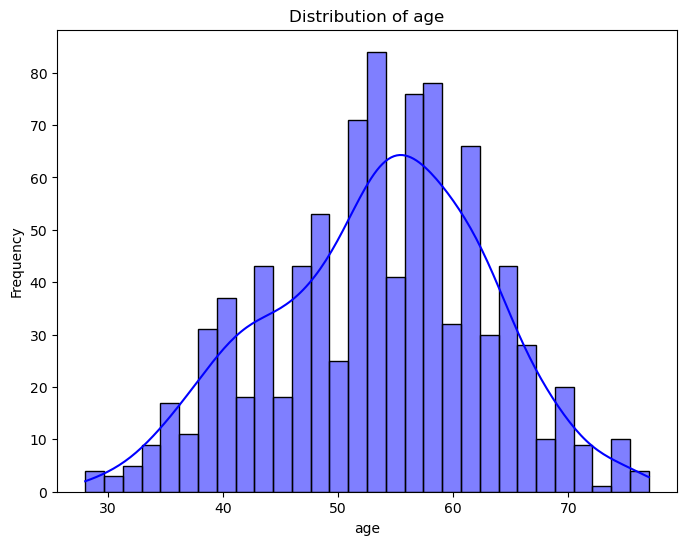

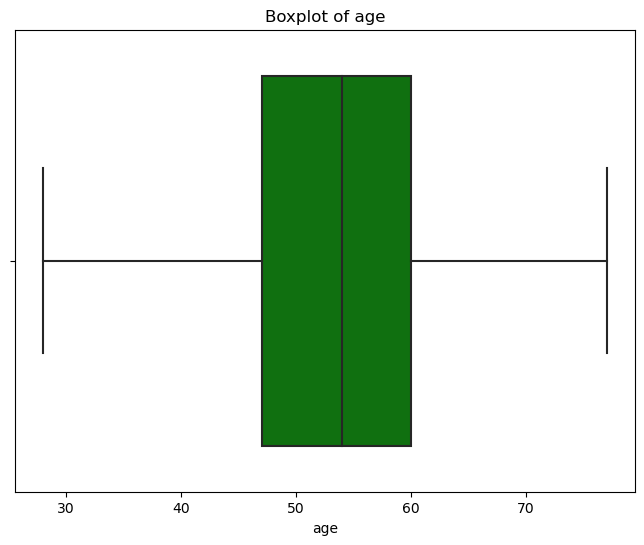

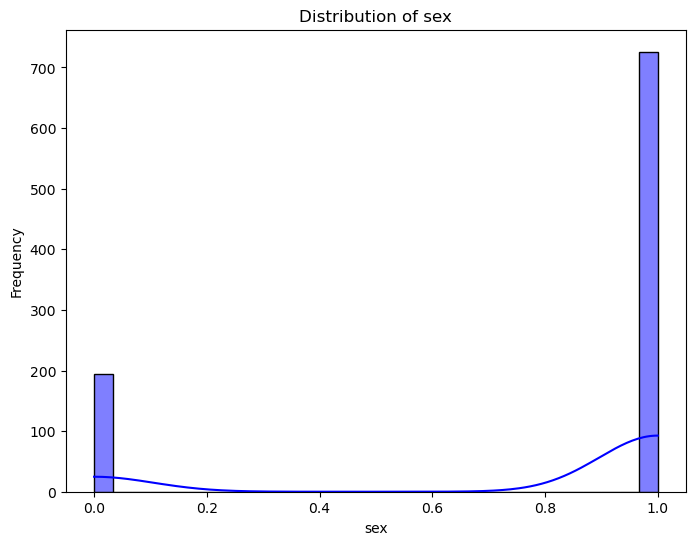

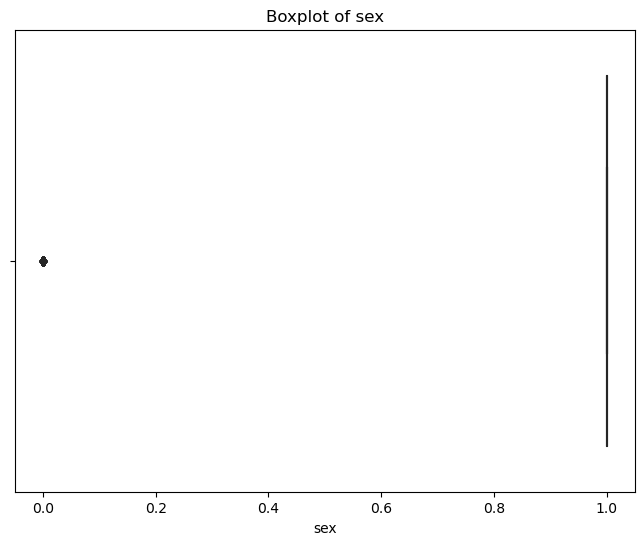

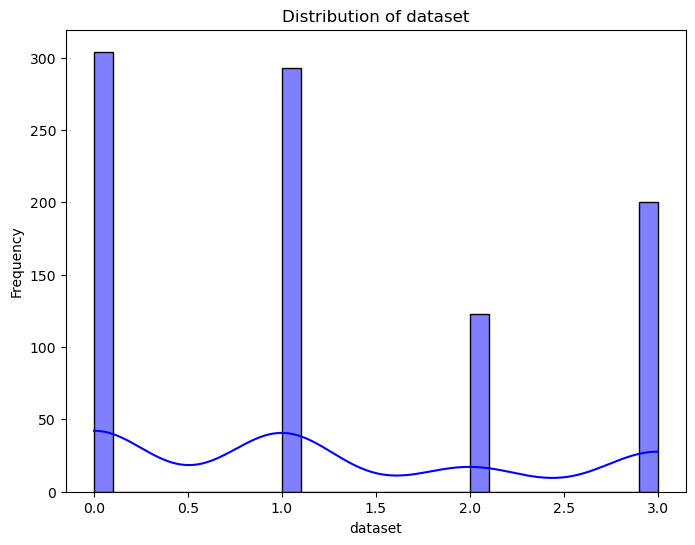

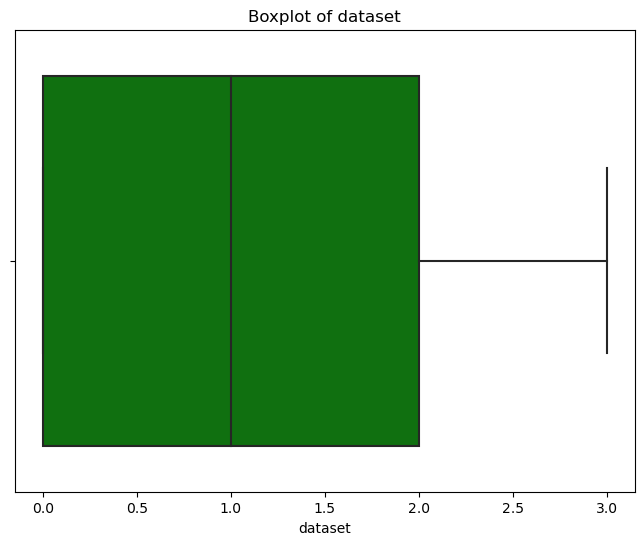

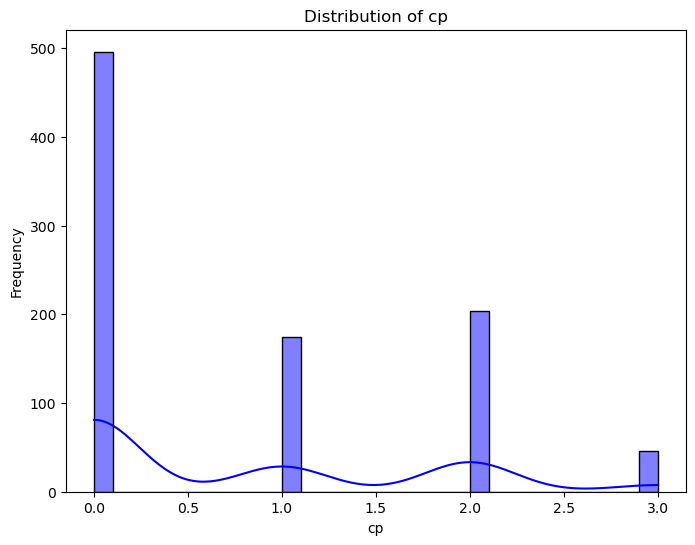

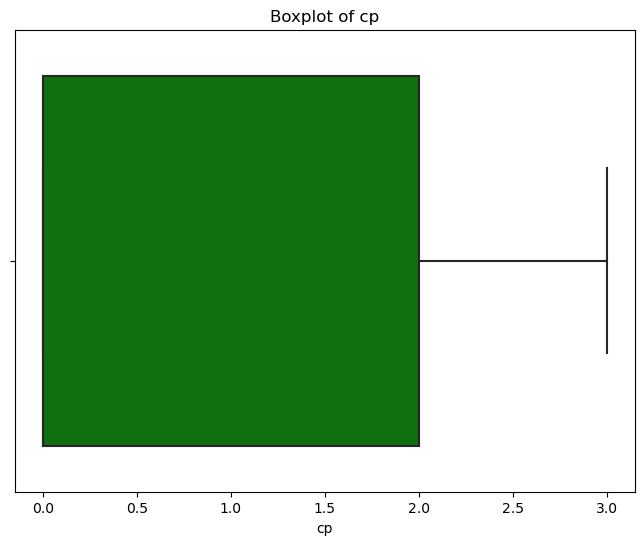

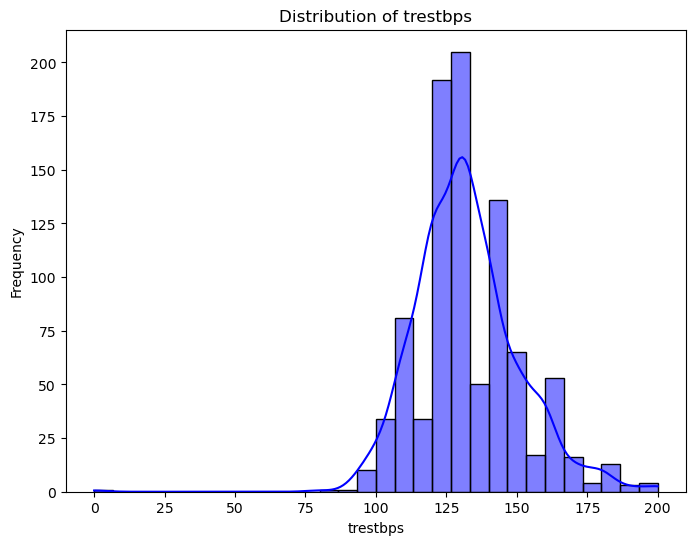

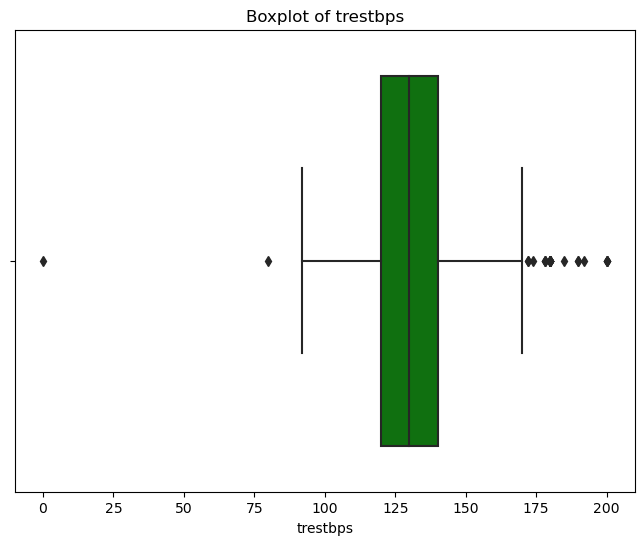

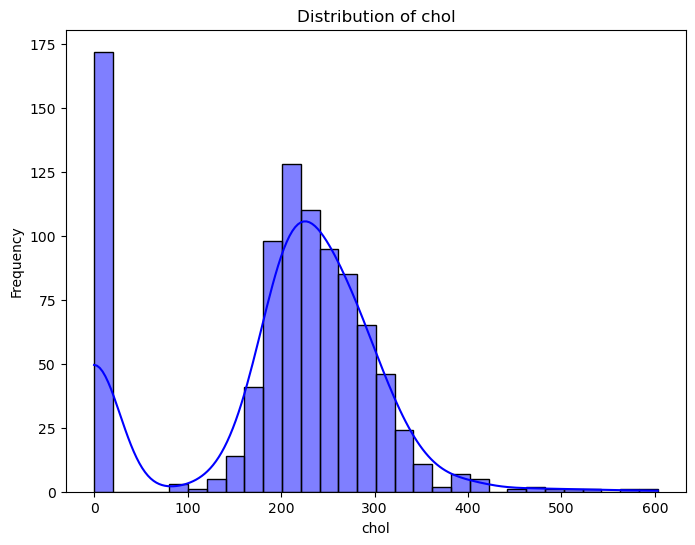

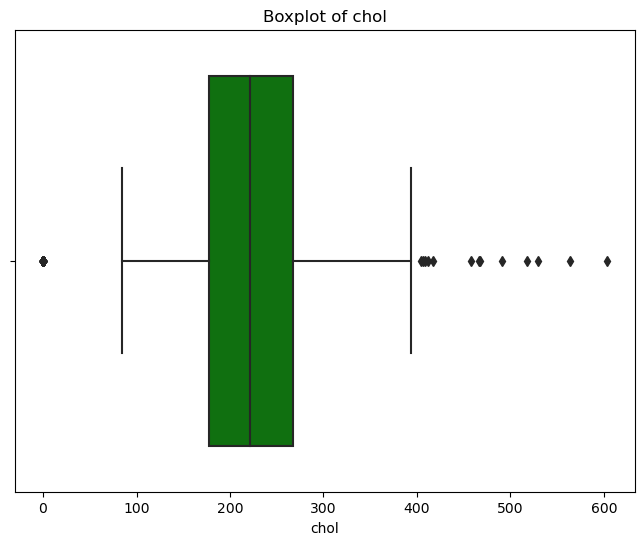

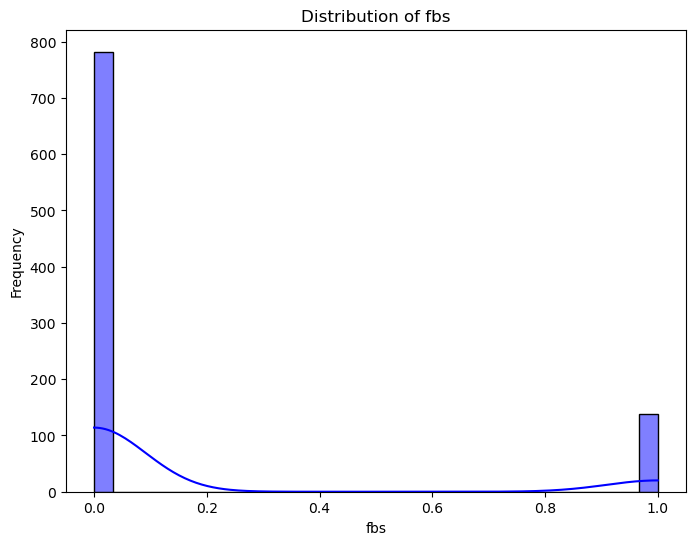

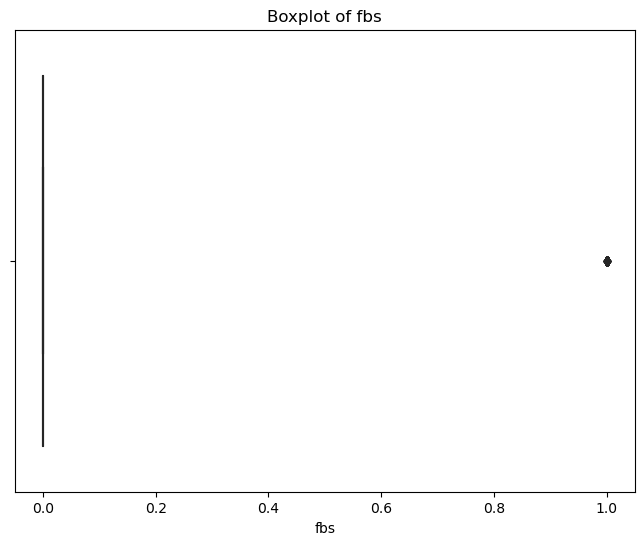

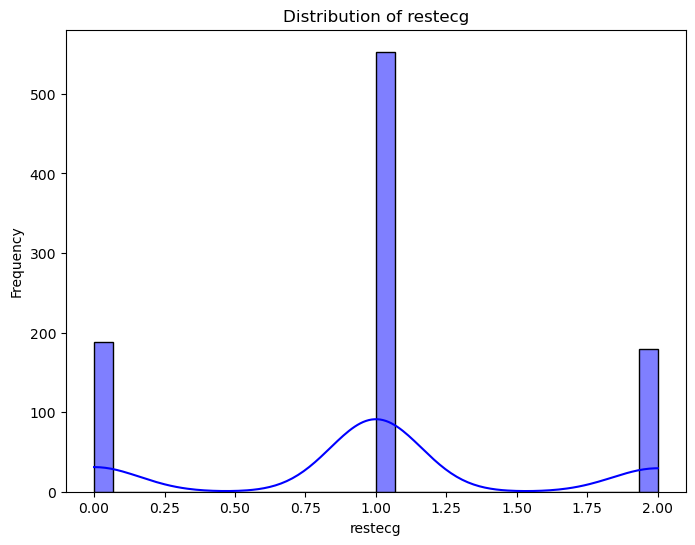

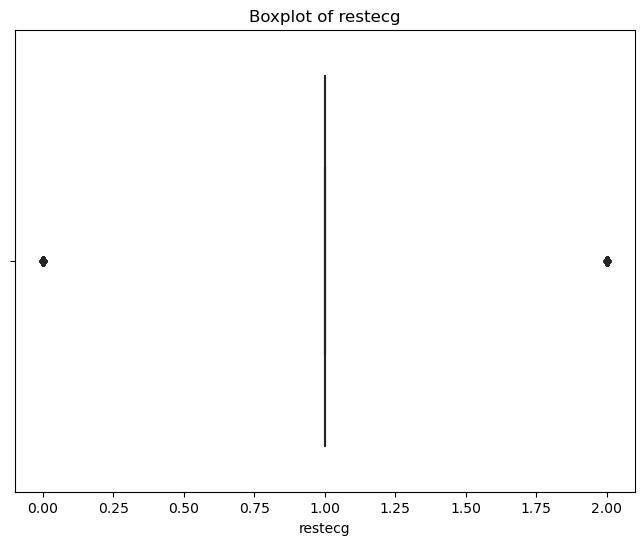

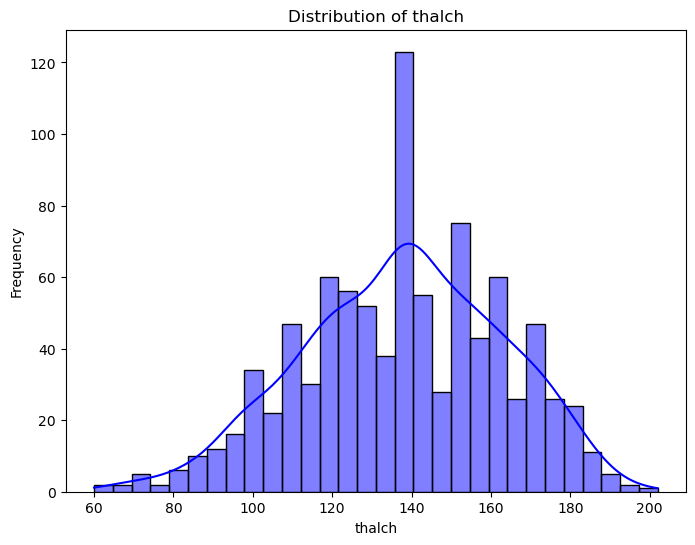

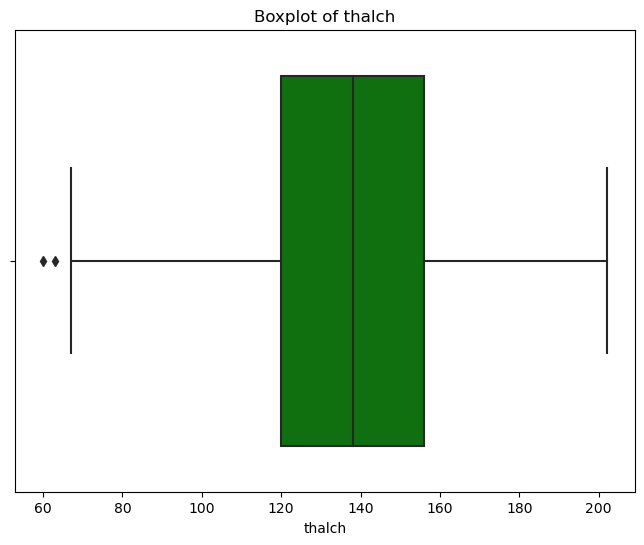

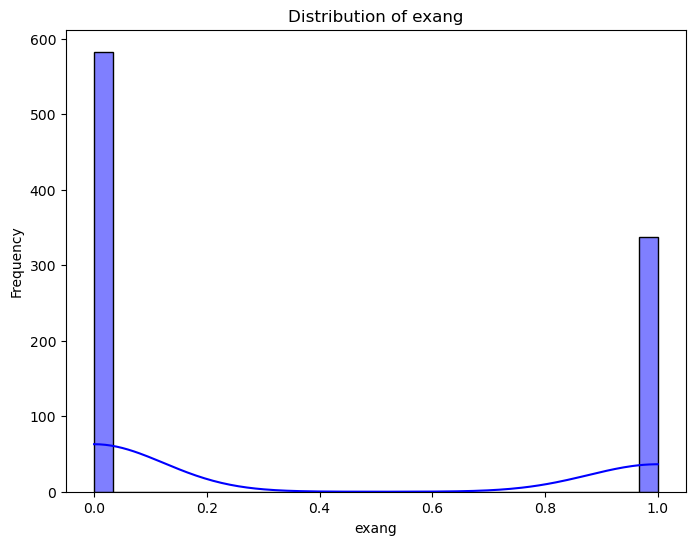

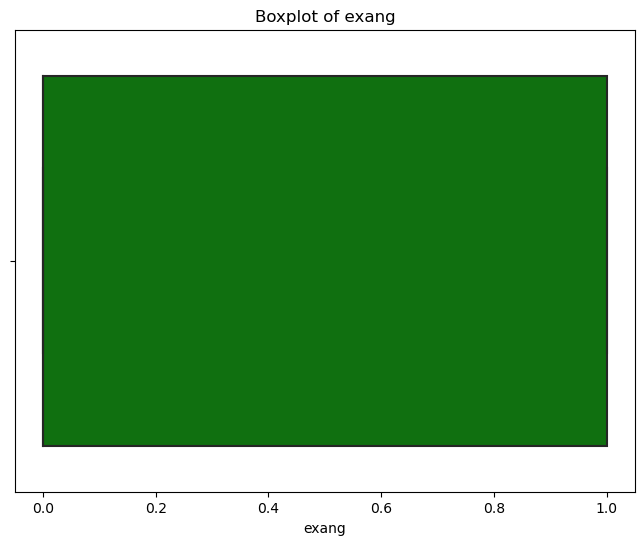

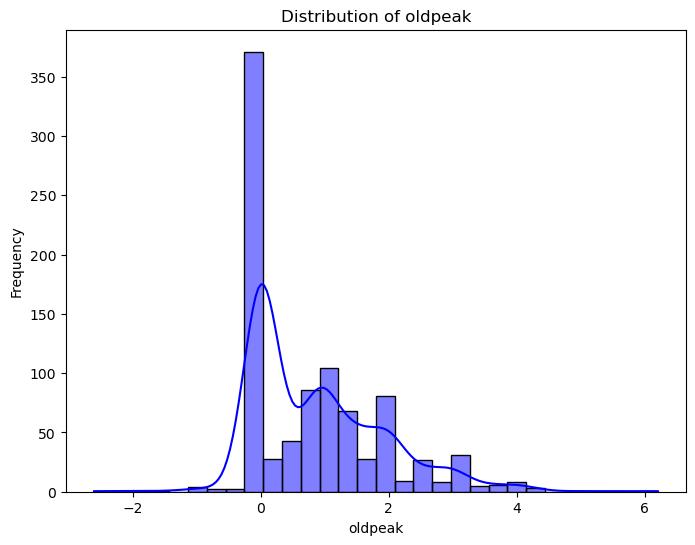

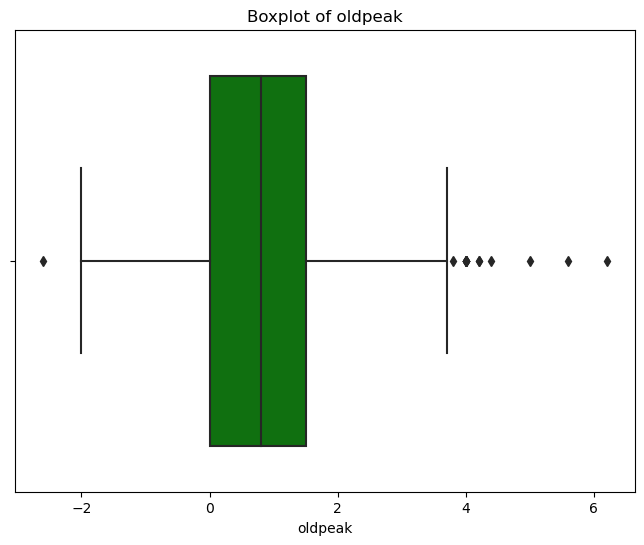

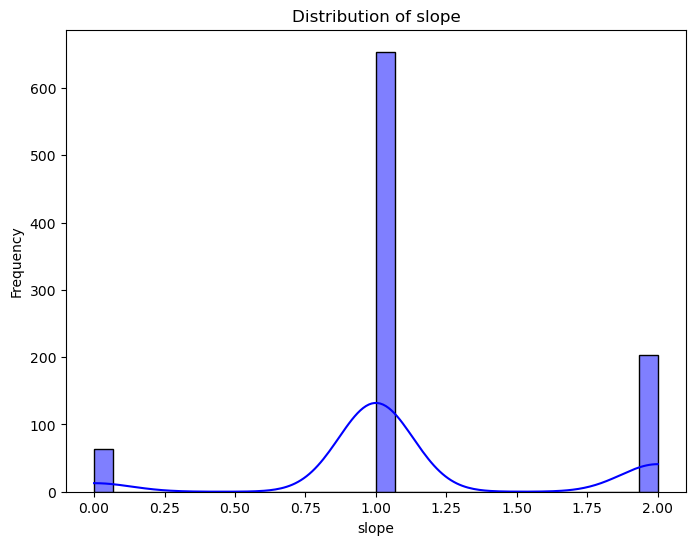

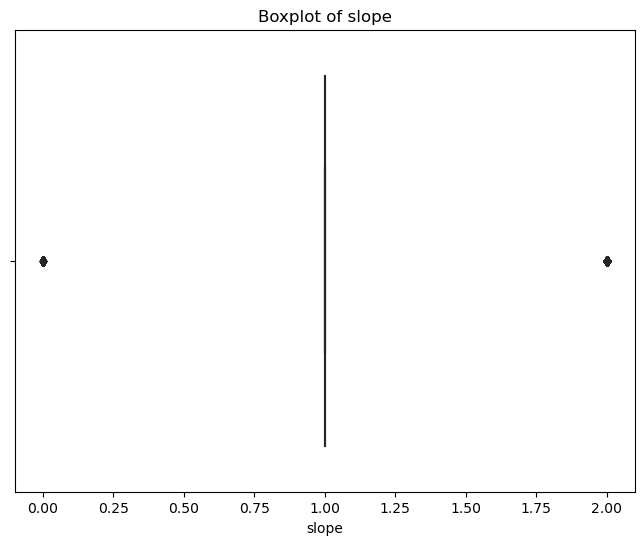

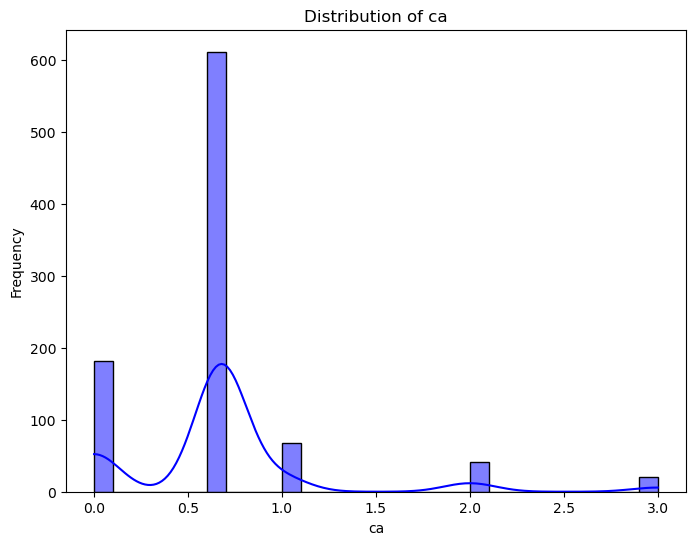

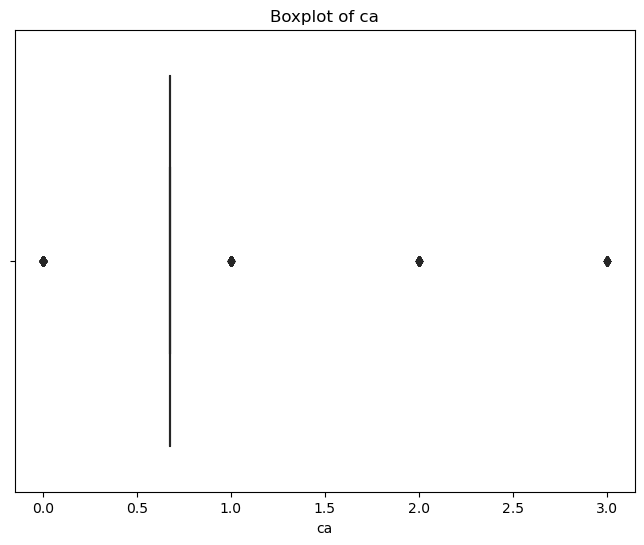

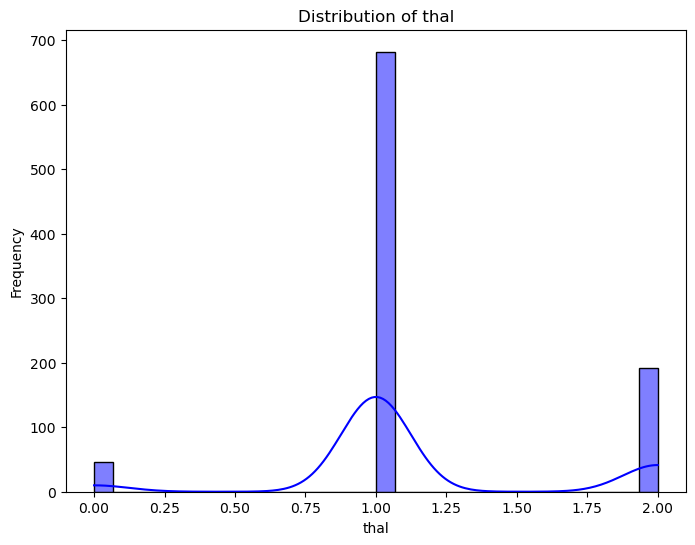

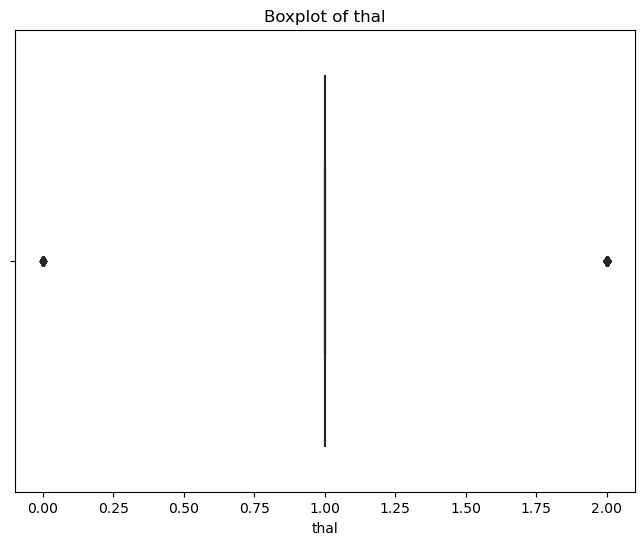

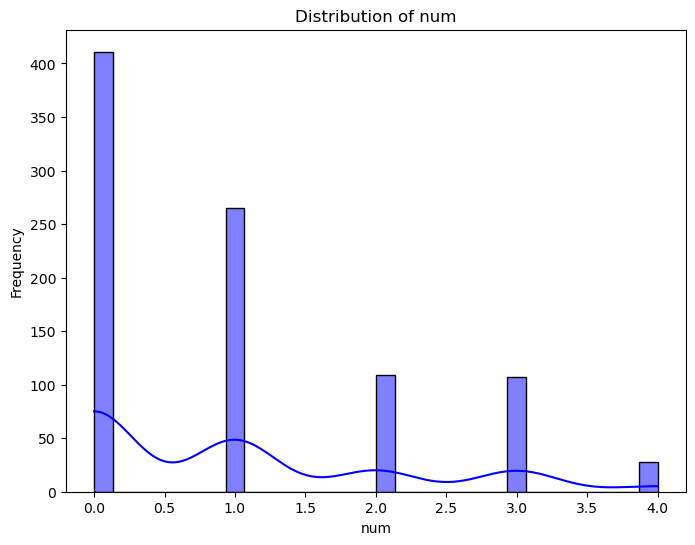

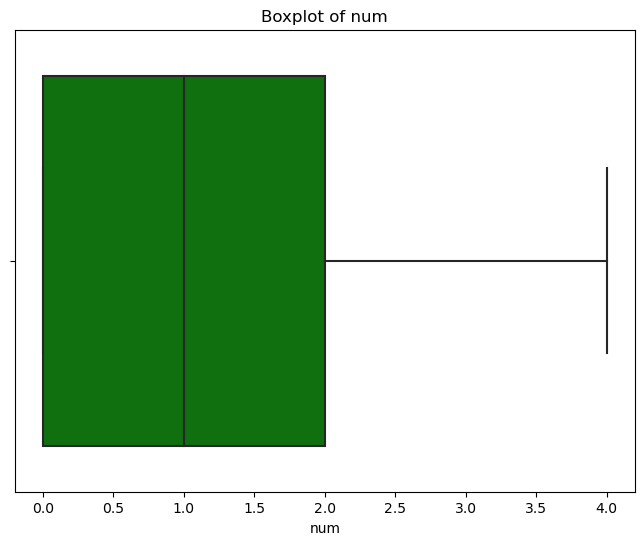

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics for numerical columns
print("Summary statistics for numerical columns:\n", df[numerical_columns].describe())

# Visualize the distribution of numerical columns using histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to visualize outliers and distribution
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()
